# Part 1: Data Exploration

## Part 1.1: Understand the Raw Dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
credit_risk = 'https://raw.githubusercontent.com/tracysnowf/Deloitte-CapstoneProject/main/data/Mortgage%20Lending_raw.csv'
df_cr = pd.read_csv(credit_risk, sep = ',')

In [9]:
df_cr.head() # column 0 is redundant

,Unnamed: 0,derived_ethnicity,derived_race,derived_sex,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_only_payment,balloon_payment,income,debt_to_income_ratio,applicant_age
0,0,Not Hispanic or Latino,Black or African American,Female,1,2,1,32,105000.0,75.0,2,2,91.0,48,35-44
1,1,Not Hispanic or Latino,Black or African American,Female,3,2,1,31,275000.0,52.38,2,2,142.0,44,>74
2,2,Hispanic or Latino,White,Male,3,2,1,1,235000.0,80.0,2,2,60.0,38,35-44
3,3,Not Hispanic or Latino,White,Male,1,2,1,1,465000.0,94.69,2,2,112.0,42,35-44
4,4,Not Hispanic or Latino,Black or African American,Male,1,1,3,1,415000.0,100.0,2,2,83.0,50%-60%,25-34


In [10]:
# check data info
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14509 entries, 0 to 14508
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14509 non-null  int64  
 1   derived_ethnicity      14509 non-null  object 
 2   derived_race           14509 non-null  object 
 3   derived_sex            14509 non-null  object 
 4   action_taken           14509 non-null  int64  
 5   preapproval            14509 non-null  int64  
 6   loan_type              14509 non-null  int64  
 7   loan_purpose           14509 non-null  int64  
 8   loan_amount            14509 non-null  float64
 9   loan_to_value_ratio    13902 non-null  object 
 10  interest_only_payment  14509 non-null  int64  
 11  balloon_payment        14509 non-null  int64  
 12  income                 14027 non-null  float64
 13  debt_to_income_ratio   13787 non-null  object 
 14  applicant_age          14509 non-null  object 
dtypes:

In [11]:
# check the unique values for each column
df_cr.nunique()

Unnamed: 0               14509
derived_ethnicity            5
derived_race                 9
derived_sex                  2
action_taken                 2
preapproval                  2
loan_type                    4
loan_purpose                 6
loan_amount                237
loan_to_value_ratio       7074
interest_only_payment        3
balloon_payment              3
income                     778
debt_to_income_ratio        20
applicant_age                8
dtype: int64

In [12]:
df_cr = df_cr.drop('Unnamed: 0', 1) # delete index column from csv

##### action_taken - Y variable
1 -- Loan originated (the qualification and verification process that begins a new loan.) <br>
2 -- Application approved but not accepted (If the loan was approved before closing but the applicant either failed to respond or the loan was not otherwise closed, then the action taken would be reported as approved but not accepted.) <br>
3 -- Application denied by financial institution <br>

Comments: <br>
category 1 (a typo) might actually be 2(Approved) in the codebook, and 3 stays the same(Disapproved)

In [13]:
pd.unique(df_cr['action_taken'])

array([1, 3], dtype=int64)

In [14]:
# new codebook: 1 - Approved; 0 - Disapproved
# so change all the vlaues of 3 to 0
df_cr['action_taken'].mask((df_cr['action_taken'] == 3), 0, inplace=True)

In [15]:
# check the distribution of target variable action_taken
df_cr.loc[:,'action_taken'].value_counts()

1    10871
0     3638
Name: action_taken, dtype: int64

In [16]:
# target variable
y = df_cr['action_taken']

## Part 1.2: Understand the Features

In [17]:
# understand overall features
df_cr.describe()
# Action Taken:
# 1 -- Loan originated
# 2 -- Application approved but not accepted
# 3 -- Application denied by financial institution

# Preapproval:
# 1 -- Preapproval was requested
# 2 -- Preapproval was not requested

# Loan Type: **75% IQR = 1
# 1 -- Conventional (any loan other than FHA, VA, FSA, or RHS loans)
# 2 -- FHA-insured (Federal Housing Administration)
# 3 -- VA-guaranteed (Veterans Administration)
# 4 -- FSA/RHS (Farm Service Agency or Rural Housing Service)

# Loan Purpose: **error data,
# 1 -- Home purchase
# 2 -- Home improvement
# 3 -- Refinancing

# Loan Amount: in thousands of dollars

# interest_only_payment **not in the codebook, 1111？

# balloon_payment **not in the codebook, 1111？

# income: Gross Annual Income: in thousands of dollars **negative/ error data

,action_taken,preapproval,loan_type,loan_purpose,loan_amount,interest_only_payment,balloon_payment,income
count,14509.000000,14509.000000,14509.000000,14509.000000,1.450900e+04,14509.000000,14509.000000,14027.000000
mean,0.749259,1.978979,1.147081,14.755669,3.924981e+05,14.098973,14.135295,160.826335
std,0.433455,0.143461,0.459418,14.860877,3.340678e+05,115.466461,115.462492,297.351109
min,0.000000,1.000000,1.000000,1.000000,5.000000e+03,1.000000,1.000000,-123.000000
25%,0.000000,2.000000,1.000000,1.000000,1.950000e+05,2.000000,2.000000,79.000000
50%,1.000000,2.000000,1.000000,4.000000,3.450000e+05,2.000000,2.000000,116.000000
75%,1.000000,2.000000,1.000000,31.000000,5.050000e+05,2.000000,2.000000,170.000000
max,1.000000,2.000000,4.000000,32.000000,7.505000e+06,1111.000000,1111.000000,20000.000000


### Numerical Features Data Cleaning 

In [18]:
# understand numerical features
# loan_amount look normal, need to clean column loan_to_value_ratio, income
df_cr[["loan_amount", "loan_to_value_ratio", "income"]].describe()

,loan_amount,income
count,1.450900e+04,14027.000000
mean,3.924981e+05,160.826335
std,3.340678e+05,297.351109
min,5.000000e+03,-123.000000
25%,1.950000e+05,79.000000
50%,3.450000e+05,116.000000
75%,5.050000e+05,170.000000
max,7.505000e+06,20000.000000


##### loan_to_value_ratio
The loan-to-value (LTV) ratio is a measure comparing the amount of your mortgage with the appraised value of the property. The higher your down payment, the lower your LTV ratio.

In [19]:
pd.unique(df_cr['loan_to_value_ratio'])

array(['75.0', '52.38', '80.0', ..., '68.883', '87.03', '52.45'],
      dtype=object)

In [20]:
df_cr['loan_to_value_ratio'].map(type).value_counts()

<class 'str'>      13902
<class 'float'>      607
Name: loan_to_value_ratio, dtype: int64

In [21]:
# 607 null values
len(df_cr[pd.to_numeric(df_cr['loan_to_value_ratio'].isnull(),errors='coerce')])

607

In [22]:
# 159 Exempt values
len(df_cr[(df_cr['loan_to_value_ratio'] == "Exempt")])

159

In [23]:
# drop 607 null values and 159 Exempt values
df_cr = df_cr[pd.to_numeric(df_cr['loan_to_value_ratio'].notnull(),errors='coerce')]
df_cr = df_cr[(df_cr['loan_to_value_ratio'] != "Exempt")]
# reset index
df_cr = df_cr.reset_index(drop = True)
# cast string types of values to numeric type
pd.to_numeric(df_cr['loan_to_value_ratio'], errors='coerce')
# cast string types of values to numeric type
df_cr['loan_to_value_ratio'] = pd.to_numeric(df_cr['loan_to_value_ratio'], errors='coerce')

In [24]:
# check the result
df_cr['loan_to_value_ratio'].map(type).value_counts()

<class 'float'>    13743
Name: loan_to_value_ratio, dtype: int64

##### income

In [25]:
# 252 null values
len(df_cr[pd.to_numeric(df_cr['income'].isnull(),errors='coerce')])

252

In [26]:
# 10 negative/ error values
len(df_cr[(df_cr['income'] < 0)])

10

In [27]:
# drop 252 null values, 10 negative values
df_cr = df_cr[pd.to_numeric(df_cr['income'].notnull(),errors='coerce')]
df_cr = df_cr[(df_cr['income'] >= 0)]
# reset index
df_cr = df_cr.reset_index(drop = True)

In [28]:
# check the result
df_cr['loan_to_value_ratio'].map(type).value_counts()

<class 'float'>    13481
Name: loan_to_value_ratio, dtype: int64

#### Cleaned Numeric Features Summary

In [29]:
# understand numeric features
df_cr[["loan_amount", "loan_to_value_ratio", "income"]].describe()

,loan_amount,loan_to_value_ratio,income
count,1.348100e+04,13481.000000,13481.000000
mean,3.935965e+05,71.589195,162.252800
std,3.268280e+05,27.614554,296.002794
min,5.000000e+03,0.541000,0.000000
25%,1.950000e+05,59.060000,80.000000
50%,3.450000e+05,75.000000,118.000000
75%,5.050000e+05,88.337000,172.000000
max,7.505000e+06,999.999000,20000.000000


#### Correlation of Numeric Features

In [65]:
# correlation heat map of numerical features
sns.set()

numCol = []
for col in df_cr:
  if df_cr[col].dtype == np.float64:
    numCol.append(col)
corr = df_cr[numCol].corr()

[Text(0.5, 0, 'loan_amount'),
 Text(1.5, 0, 'loan_to_value_ratio'),
 Text(2.5, 0, 'income')]

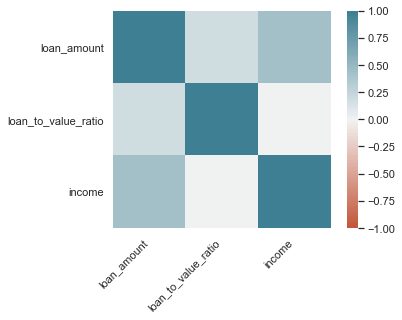

In [66]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [71]:
# check the actual values of correlations
corr_score = df_cr[numCol].corr()
corr_score
# heatmap conclusion: all good, no column needs to be dropped.

,loan_amount,loan_to_value_ratio,income
loan_amount,1.000000,0.184705,0.433686
loan_to_value_ratio,0.184705,1.000000,0.006124
income,0.433686,0.006124,1.000000


### Categorical Features Data Cleaning 

##### loan_type
1 -- Conventional (any loan other than FHA, VA, FSA, or RHS loans) <br>
2 -- FHA-insured (Federal Housing Administration) <br>
3 -- VA-guaranteed (Veterans Administration) <br>
4 -- FSA/RHS (Farm Service Agency or Rural Housing Service) <br>

Comments: <br>
75% IQR = 1 <br>
About 90% of the whole loan type is type 1 - Conventional among the 4 types. <br>
Is this data representative to the whole population? <br>
possible research directions: if people with a Conventional loan type have an obviously higher/lower chance to get approved for the loan compared to people with a NON Conventional loan type?

In [30]:
len(df_cr[df_cr['loan_type'] == 1]) / len(df_cr['loan_type'])

0.9175877160448038

<AxesSubplot:>

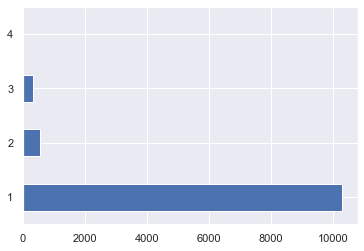

In [78]:
# explore loan_type category
df_cr["loan_type"].value_counts().plot(kind='barh')

##### loan_purpose ** error data 31, 32, 4, 5
1 -- Home purchase <br>
2 -- Home improvement <br>
3 -- Refinancing

<AxesSubplot:>

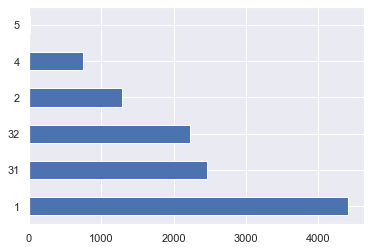

In [72]:
# explore loan_purpose category
df_cr["loan_purpose"].value_counts().plot(kind='barh')

##### derived_ethnicity

In [31]:
pd.unique(df_cr['derived_ethnicity'])

array(['Not Hispanic or Latino', 'Hispanic or Latino', 'Joint',
       'Ethnicity Not Available', 'Free Form Text Only'], dtype=object)

In [32]:
# Convert 'Joint', 'Ethnicity Not Available', 'Free Form Text Only' to NAs
df_cr['derived_ethnicity'].mask((df_cr['derived_ethnicity'] == 'Joint') |
                                (df_cr['derived_ethnicity'] == 'Ethnicity Not Available') |
                                (df_cr['derived_ethnicity'] == 'Free Form Text Only'), None, inplace=True)

In [33]:
df_cr['derived_ethnicity'].map(type).value_counts()

<class 'str'>         11750
<class 'NoneType'>     1731
Name: derived_ethnicity, dtype: int64

In [34]:
# drop 1878 null values
df_cr = df_cr[pd.to_numeric(df_cr['derived_ethnicity'].notnull(),errors='coerce')]

In [35]:
df_cr['derived_ethnicity'].map(type).value_counts()

<class 'str'>    11750
Name: derived_ethnicity, dtype: int64

In [36]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

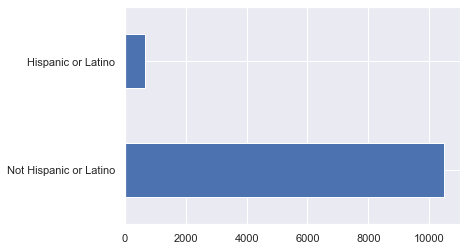

In [73]:
# explore derived_ethnicity category
df_cr["derived_ethnicity"].value_counts().plot(kind='barh')

##### derived_race

In [37]:
pd.unique(df_cr['derived_race'])

array(['Black or African American', 'White', 'Asian',
       '2 or more minority races', 'Race Not Available', 'Joint',
       'Native Hawaiian or Other Pacific Islander',
       'American Indian or Alaska Native', 'Free Form Text Only'],
      dtype=object)

In [38]:
# Convert '2 or more minority races', 'Race Not Available','American Indian or Alaska Native', 
# 'Joint', 'Native Hawaiian or Other Pacific Islander' to 'Minority Race/(s/)'
df_cr['derived_race'].mask((df_cr['derived_race'] == '2 or more minority races') |
                            (df_cr['derived_race'] == 'American Indian or Alaska Native') |
                            (df_cr['derived_race'] == 'Joint') |
                            (df_cr['derived_race'] == 'Native Hawaiian or Other Pacific Islander'), "Minority Races", inplace=True)

In [39]:
df_cr['derived_race'].mask((df_cr['derived_race'] == 'Free Form Text Only') |
                           (df_cr['derived_race'] == 'Race Not Available'), None, inplace=True)

In [40]:
df_cr['derived_race'].map(type).value_counts()

<class 'str'>         11251
<class 'NoneType'>      499
Name: derived_race, dtype: int64

In [41]:
pd.unique(df_cr['derived_race'])

array(['Black or African American', 'White', 'Asian', 'Minority Races',
       None], dtype=object)

In [42]:
# drop 526 null values
df_cr = df_cr[pd.to_numeric(df_cr['derived_race'].notnull(),errors='coerce')]

In [43]:
pd.unique(df_cr['derived_race'])

array(['Black or African American', 'White', 'Asian', 'Minority Races'],
      dtype=object)

In [44]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

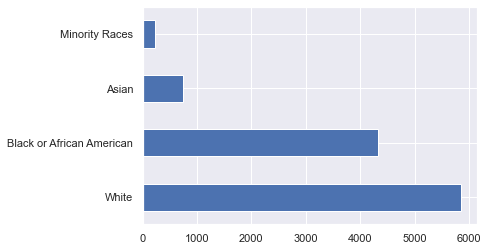

In [74]:
# explore derived_race category
df_cr["derived_race"].value_counts().plot(kind='barh')

##### derived_sex

In [45]:
pd.unique(df_cr['derived_sex']) # OK

array(['Female', 'Male'], dtype=object)

<AxesSubplot:>

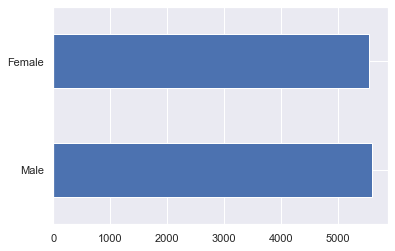

In [75]:
# explore derived_sex category
df_cr["derived_sex"].value_counts().plot(kind='barh')

##### debt_to_income_ratio

In [46]:
pd.unique(df_cr['debt_to_income_ratio']) # should create a new column: 36% - 49%, Exempt = NaN?

array(['48', '44', '38', '42', '50%-60%', '>60%', '30%-<36%', '40', '36',
       '20%-<30%', '49', '<20%', '43', '41', '47', '46', '37', '39', '45',
       nan], dtype=object)

In [47]:
df_cr["debt_to_income_ratio"].replace(['48', '44', '38', '42', '40', '36', '49', '47', '43', '41', '39', '46', '37', '45'], '36%-<50%', regex=False, inplace=True)

In [48]:
# replace "Exempt" with NAs
df_cr['debt_to_income_ratio'].mask((df_cr['debt_to_income_ratio'] == 'Exempt'), None, inplace=True)

In [49]:
# drop null values
df_cr = df_cr[pd.to_numeric(df_cr['debt_to_income_ratio'].notnull(),errors='coerce')]

In [50]:
pd.unique(df_cr['debt_to_income_ratio'])

array(['36%-<50%', '50%-60%', '>60%', '30%-<36%', '20%-<30%', '<20%'],
      dtype=object)

In [51]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

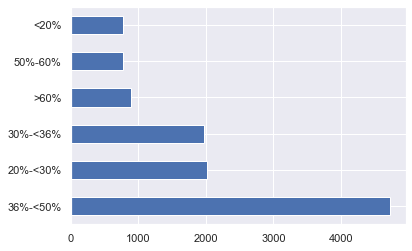

In [77]:
# explore debt_to_income_ratio category
df_cr["debt_to_income_ratio"].value_counts().plot(kind='barh')

##### applicant_age

In [52]:
pd.unique(df_cr['applicant_age']) # 8888
# df_cr[(df_cr['applicant_age'] == '8888')] # print 4 rows with age = 8888

array(['35-44', '>74', '25-34', '55-64', '45-54', '65-74', '<25', '8888'],
      dtype=object)

In [53]:
# drop rows with 8888
df_cr.drop(df_cr.index[df_cr['applicant_age'] == '8888'], inplace=True)

In [54]:
pd.unique(df_cr['applicant_age'])

array(['35-44', '>74', '25-34', '55-64', '45-54', '65-74', '<25'],
      dtype=object)

In [55]:
# reset index
df_cr = df_cr.reset_index(drop = True)

<AxesSubplot:>

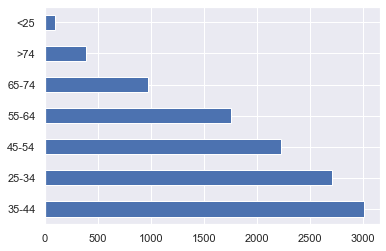

In [76]:
# explore applicant_age category
df_cr["applicant_age"].value_counts().plot(kind='barh')

In [56]:
# cleaned dataset info
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   derived_ethnicity      11153 non-null  object 
 1   derived_race           11153 non-null  object 
 2   derived_sex            11153 non-null  object 
 3   action_taken           11153 non-null  int64  
 4   preapproval            11153 non-null  int64  
 5   loan_type              11153 non-null  int64  
 6   loan_purpose           11153 non-null  int64  
 7   loan_amount            11153 non-null  float64
 8   loan_to_value_ratio    11153 non-null  float64
 9   interest_only_payment  11153 non-null  int64  
 10  balloon_payment        11153 non-null  int64  
 11  income                 11153 non-null  float64
 12  debt_to_income_ratio   11153 non-null  object 
 13  applicant_age          11153 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 1.2+ 

In [57]:
df_cr

,derived_ethnicity,derived_race,derived_sex,action_taken,preapproval,loan_type,loan_purpose,loan_amount,loan_to_value_ratio,interest_only_payment,balloon_payment,income,debt_to_income_ratio,applicant_age
0,Not Hispanic or Latino,Black or African American,Female,1,2,1,32,105000.0,75.00,2,2,91.0,36%-<50%,35-44
1,Not Hispanic or Latino,Black or African American,Female,0,2,1,31,275000.0,52.38,2,2,142.0,36%-<50%,>74
2,Hispanic or Latino,White,Male,0,2,1,1,235000.0,80.00,2,2,60.0,36%-<50%,35-44
3,Not Hispanic or Latino,White,Male,1,2,1,1,465000.0,94.69,2,2,112.0,36%-<50%,35-44
4,Not Hispanic or Latino,Black or African American,Male,1,1,3,1,415000.0,100.00,2,2,83.0,50%-60%,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,Hispanic or Latino,White,Male,0,2,1,32,225000.0,75.00,2,2,76.0,>60%,55-64
11149,Not Hispanic or Latino,Black or African American,Male,1,2,1,1,345000.0,80.00,2,2,168.0,36%-<50%,25-34
11150,Not Hispanic or Latino,Black or African American,Male,0,2,1,32,385000.0,75.00,2,2,160.0,36%-<50%,25-34
11151,Not Hispanic or Latino,White,Male,1,2,1,32,655000.0,77.00,2,2,150.0,36%-<50%,55-64


#### Understand Numerical Feature Distribution
##### loan_amount, loan_to_value_ratio, income

<AxesSubplot:xlabel='action_taken', ylabel='income'>

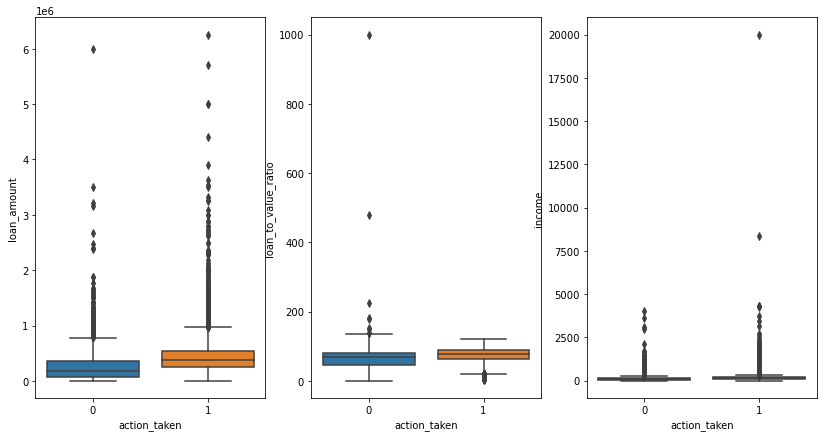

In [58]:
_,axs = plt.subplots(1,3, figsize=[14,7])
_.title = "title"
sns.boxplot(x='action_taken', y='loan_amount', data=df_cr, ax=axs[0])
sns.boxplot(x='action_taken', y='loan_to_value_ratio', data=df_cr, ax=axs[1])
sns.boxplot(x='action_taken', y='income', data=df_cr, ax=axs[2])

#### Understand Categorical Feature Distribution
##### derived_ethnicity, derived_race, interest_only_payment, balloon_payment, derived_sex, preapproval, loan_type,  loan_purpose

<AxesSubplot:xlabel='action_taken', ylabel='count'>

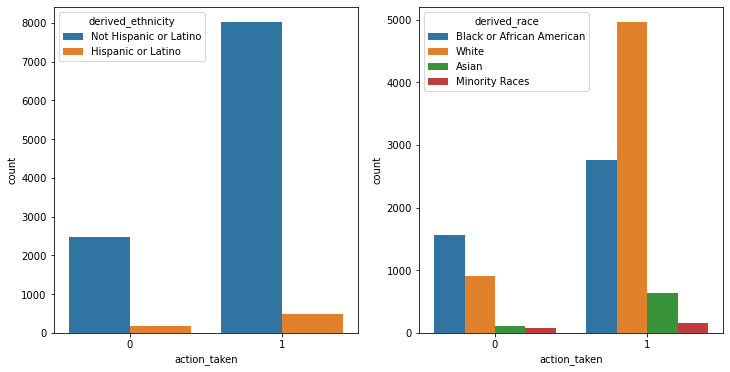

In [59]:
 _,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='derived_ethnicity', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='derived_race', data=df_cr, ax=axss[1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

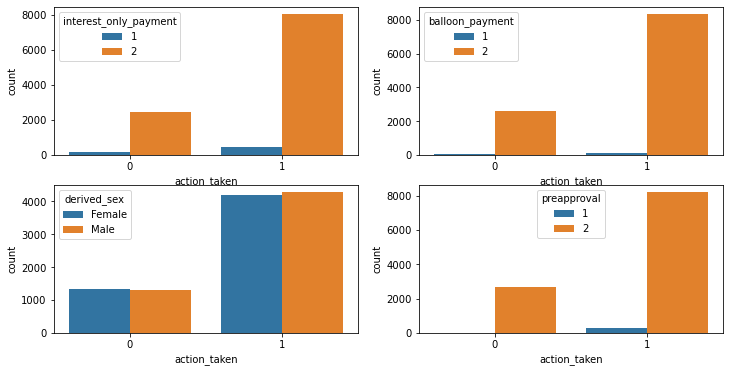

In [60]:
_,axss = plt.subplots(2,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='interest_only_payment', data=df_cr, ax=axss[0][0])
sns.countplot(x='action_taken', hue='balloon_payment', data=df_cr, ax=axss[0][1])
sns.countplot(x='action_taken', hue='derived_sex', data=df_cr, ax=axss[1][0])
sns.countplot(x='action_taken', hue='preapproval', data=df_cr, ax=axss[1][1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

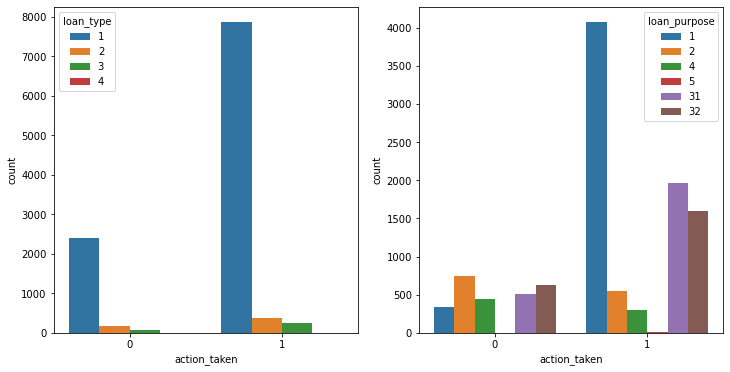

In [61]:
_,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='loan_type', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='loan_purpose', data=df_cr, ax=axss[1])

<AxesSubplot:xlabel='action_taken', ylabel='count'>

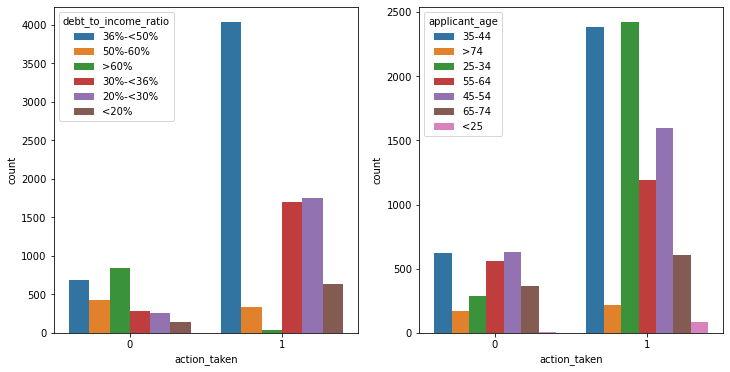

In [62]:
_,axss = plt.subplots(1,2, figsize=[12,6])
sns.countplot(x='action_taken', hue='debt_to_income_ratio', data=df_cr, ax=axss[0])
sns.countplot(x='action_taken', hue='applicant_age', data=df_cr, ax=axss[1])

# Part 2: Feature Preprocessing